# Likelihood Fit Data
 >__Created__:  October 2021, Virtual, LPC Course: Statistics in Particle Physics.
 
Create data file for notebook __likelihood_fit__. 
 

In [1]:
# standard system modules
import os, sys

# standard array manipulation module
import numpy as np

# standard plotting module
import matplotlib as mp
import matplotlib.pyplot as plt

# make plots appear inline
%matplotlib inline

In [2]:
# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')

# set usetex = False if Latex is not available on your system
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd = np.random.RandomState(seed)

### Generate some data from a double exponential

$m(x | a, b) = P \, a \exp(-a x) + (1-P) \, b \exp(-b x)$

In [31]:
A = 5.0
B =10.0
P = 2.0/3

def F(x, a, b):
    return P * np.exp(-x/a)/a + (1-P) * np.exp(-x/b)/b

r = rnd.exponential
u = rnd.uniform

M = 200
X = []
for i in range(M):
    X.append( r(A) if u() < P else r(B) )
X = np.array(X)

print('mean: %10.3f\tstd: %10.3f' % (X.mean(),X.std()))

mean:      7.252	std:      8.040


In [32]:
record = '''F: P * np.exp(-x/a)/a + (1-P) * np.exp(-x/b)/b
A: %10.3f
B: %10.3f
P: %10.3f
%s''' % (A, B, P, '\n'.join(['%10.3f' % x for x in X]) + '\n')
open('likelihood_fit_data_80.txt', 'w').write(record)

2289

In [33]:
def plotdata(d, f, 
             nbins=20, 
             xmin=0, xmax=40, 
             ymin=0, ymax=0.4, 
             ftsize=20, 
             color=(0,0,1), 
             fgsize=(5, 5)):
    
    h = (xmax-xmin)/nbins
    x = np.arange(xmin, xmax, h)
    
    # set size of figure
    fig = plt.figure(figsize=fgsize)

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    
    # annotate axes
    plt.xlabel(r'$x$', fontsize=ftsize)
    plt.ylabel(r'$f(x, a, b)$', fontsize=ftsize)
    
    # histogram data
    # returns y, x, o
    # y: counts
    # x: bin boundaries
    # o: objects (not used, hence the use of "_")
    
    w = np.ones(len(d))/len(d)
    plt.hist(d, 
             weights=w,
             bins=nbins, 
             color='steelblue', 
             alpha=0.3,
             range=(xmin, xmax)) 
    
    g = f(x, A, B) * h
    plt.plot(x, g, color='red')
    
    fig.tight_layout()
    plt.savefig('fig_likelihood_data.pdf')
    plt.show()

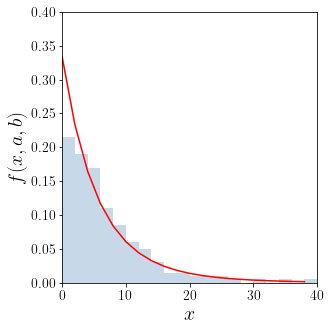

In [34]:
plotdata(X, F)

In [35]:
def nll(a, b):
    f = -np.log(F(X, a, b))
    return f.sum()

In [36]:
AMIN, BMIN = 0.1, 0.1
AMAX, BMAX = 20, 30
def compute_lhood(nsteps=100, 
                  xmin=AMIN, xmax=AMAX,
                  ymin=BMIN, ymax=BMAX):
    
    # 1. first create a mesh
    # 2. compute likelihood at mesh points
    xdelta = float(xmax-xmin)/nsteps
    ydelta = float(ymax-ymin)/nsteps
    x      = np.arange(xmin, xmax, xdelta)
    y      = np.arange(ymin, ymax, ydelta)
    x, y   = np.meshgrid(x, y)

    z = [nll(a, b) for a, b in zip(x.flatten(), y.flatten())]
    z = np.array(z).reshape(x.shape)
    z = np.exp(-z)
    return (x, y, z)

In [37]:
points = compute_lhood()

In [38]:
def plot_lhood(points,
               nsteps=50, 
               xmin=AMIN, xmax=AMAX, 
               ymin=BMIN, ymax=BMAX, 
               ftsize=20, 
               color=(0,0,1), 
               fgsize=(5, 5)):

    # set size of figure
    fig = plt.figure(figsize=fgsize)

    plt.xlim([xmin, xmax])
    #plt.ylim([ymin, ymax])
    
    # annotate axes
    plt.xlabel(r'$a$', fontsize=ftsize)
    plt.ylabel(r'$b$', fontsize=ftsize)
    
    rainbow= plt.get_cmap('rainbow')
    earth  = plt.get_cmap('gist_earth')
   
    # plot contours
    x, y, z  = points
    plt.contour(x, y, z, cmap=rainbow)
    
    fig.tight_layout()
    plt.savefig('fig_likelihood_80.pdf')
    plt.show()

### Now plot likelihood

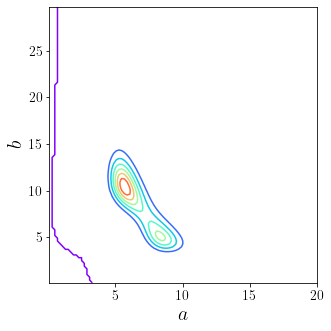

In [39]:
plot_lhood(points)